# Quadrants

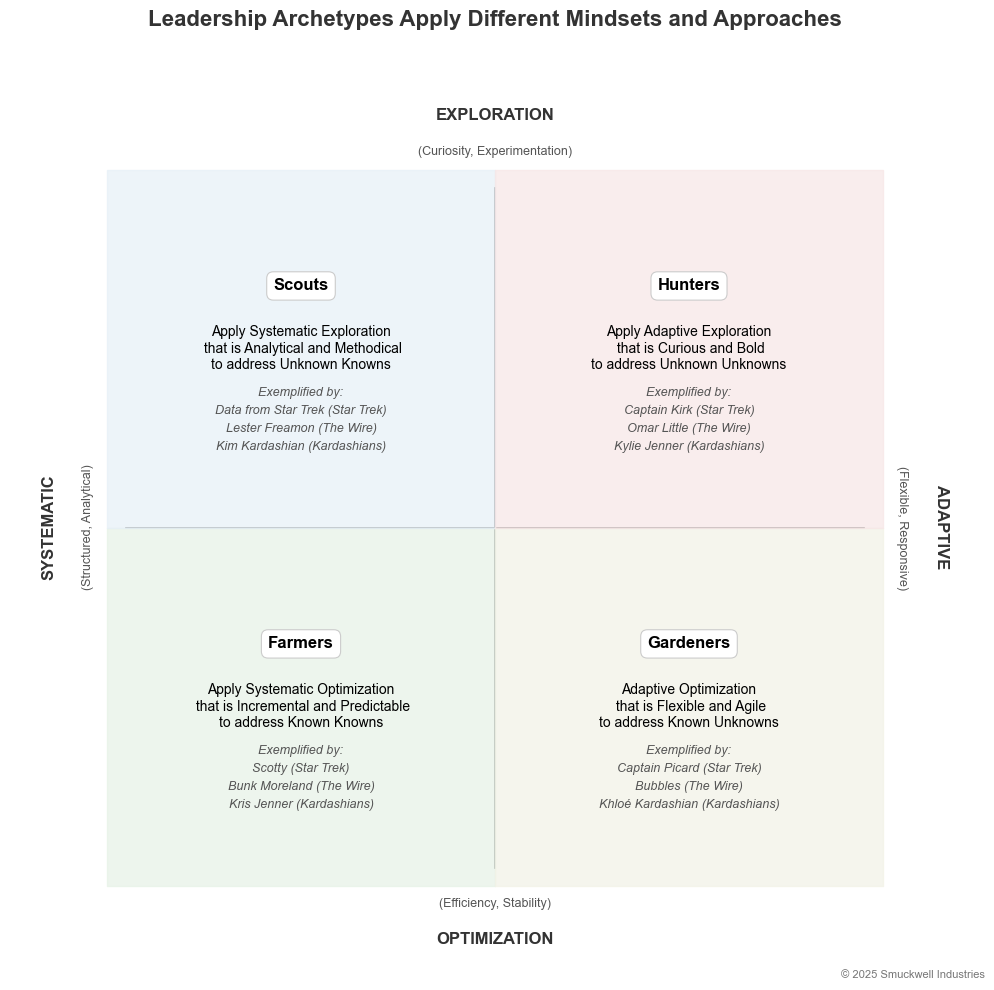

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes Apply Different Mindsets and Approaches")

# Add copyright notice at the bottom of the figure
fig.text(0.99, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()

# Lifecycle

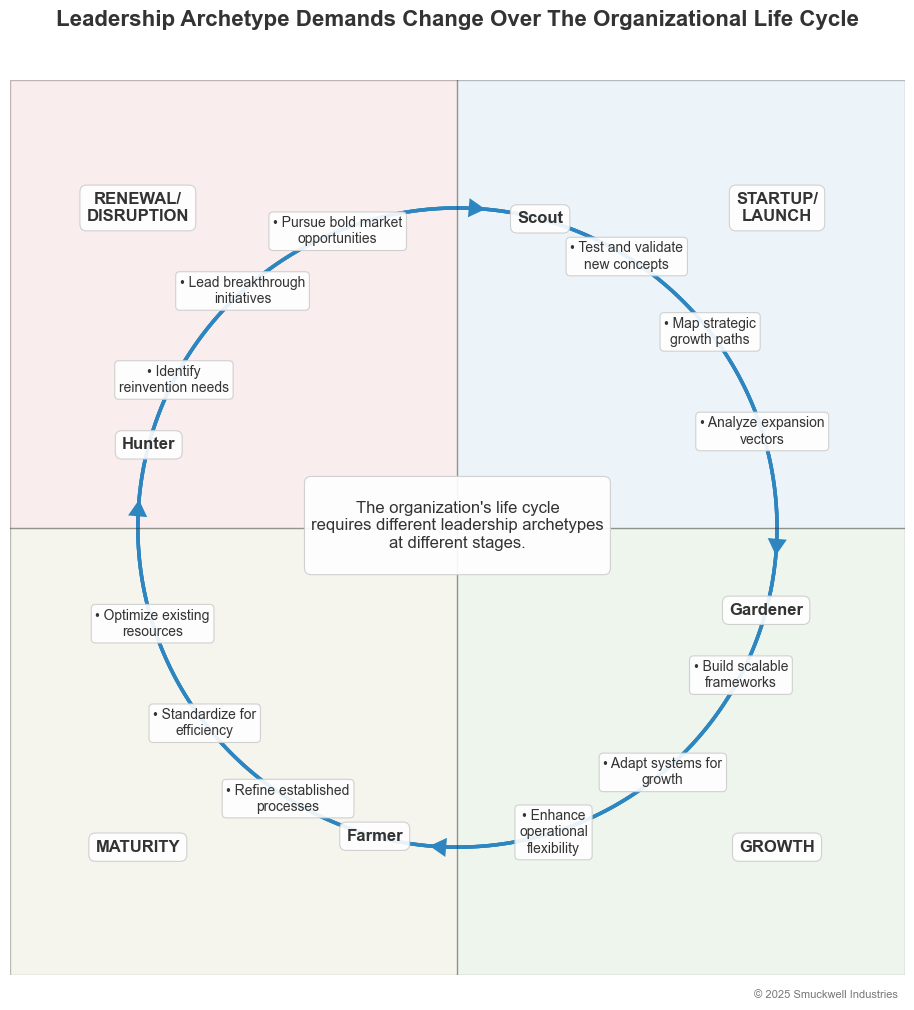

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Arc, Circle, PathPatch
from matplotlib.path import Path
import matplotlib.font_manager as fm
import numpy as np
import os
import textwrap  # for wrapping activity text
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Define a helper to rotate a point by a given angle (in degrees) counterclockwise around the origin
def rotate_point(point, angle_deg):
    angle_rad = np.radians(angle_deg)
    x, y = point
    x_new = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_new = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return (x_new, y_new)

# Create figure and axis using the standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
ax.axis('off')

# Fill quadrants with colors that match the archetype quadrants visualization
quadrant_alpha = 0.7  # Match alpha from the quadrants visualization
q1 = plt.Rectangle((0, 0), 7, 7, facecolor=HBR_COLORS['quadrant2'], alpha=quadrant_alpha, edgecolor='none')
q2 = plt.Rectangle((0, -7), 7, 7, facecolor=HBR_COLORS['quadrant1'], alpha=quadrant_alpha, edgecolor='none')
q3 = plt.Rectangle((-7, -7), 7, 7, facecolor=HBR_COLORS['quadrant3'], alpha=quadrant_alpha, edgecolor='none')
q4 = plt.Rectangle((-7, 0), 7, 7, facecolor=HBR_COLORS['quadrant4'], alpha=quadrant_alpha, edgecolor='none')
ax.add_patch(q1)
ax.add_patch(q2)
ax.add_patch(q3)
ax.add_patch(q4)

rotation_offset = 75  # degrees to rotate the archetype positions

# Rotate archetype positions by 30° counterclockwise (using r = 5)
hunter = rotate_point((0, 5), rotation_offset)      # originally top center becomes rotated
scout = rotate_point((5, 0), rotation_offset)         # originally right center
gardener = rotate_point((0, -5), rotation_offset)     # originally bottom center
farmer = rotate_point((-5, 0), rotation_offset)       # originally left center

# Create a cleaner box style for text using the shared style
clean_box = dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, 
                 edgecolor='#cccccc', linewidth=0.8)

# Offset factor for archetype labels so they sit just outside the points
offset_factor = 0.0
hunter_text_pos = (hunter[0]*(1+offset_factor), hunter[1]*(1+offset_factor))
scout_text_pos = (scout[0]*(1+offset_factor), scout[1]*(1+offset_factor))
gardener_text_pos = (gardener[0]*(1+offset_factor), gardener[1]*(1+offset_factor))
farmer_text_pos = (farmer[0]*(1+offset_factor), farmer[1]*(1+offset_factor))

# Annotate archetypes using the rotated coordinates
ax.text(hunter_text_pos[0], hunter_text_pos[1], "Hunter", 
        ha='center', va='center', fontsize=12, weight='bold', color=HBR_COLORS['text'], bbox=clean_box)
ax.text(scout_text_pos[0], scout_text_pos[1], "Scout", 
        ha='center', va='center', fontsize=12, weight='bold', color=HBR_COLORS['text'], bbox=clean_box)
ax.text(gardener_text_pos[0], gardener_text_pos[1], "Gardener", 
        ha='center', va='center', fontsize=12, weight='bold', color=HBR_COLORS['text'], bbox=clean_box)
ax.text(farmer_text_pos[0], farmer_text_pos[1], "Farmer", 
        ha='center', va='center', fontsize=12, weight='bold', color=HBR_COLORS['text'], bbox=clean_box)

# Define activities for each quadrant (arranged Hunter → Scout, etc.)
hunter_activities = [
    "• Identify reinvention needs",
    "• Lead breakthrough initiatives",
    "• Pursue bold market opportunities"
]

scout_activities = [
    "• Test and validate new concepts",
    "• Map strategic growth paths",
    "• Analyze expansion vectors"
]

gardener_activities = [
    "• Build scalable frameworks",
    "• Adapt systems for growth",
    "• Enhance operational flexibility"
]

farmer_activities = [
    "• Refine established processes",
    "• Standardize for efficiency",
    "• Optimize existing resources"
]

# Function to create an arrow head at the end of a path (unchanged)
def arrow_head(point, angle, size=0.3):
    angle_rad = np.radians(angle)
    dx1 = -size * np.cos(angle_rad - np.pi/6)
    dy1 = -size * np.sin(angle_rad - np.pi/6)
    dx2 = -size * np.cos(angle_rad + np.pi/6)
    dy2 = -size * np.sin(angle_rad + np.pi/6)
    
    arrow_path = Path([
        (point[0], point[1]),  # tip
        (point[0] + dx1, point[1] + dy1),  # right corner
        (point[0] + dx2, point[1] + dy2),  # left corner
        (point[0], point[1]),  # back to tip to close the path
    ], [Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY])
    
    return PathPatch(arrow_path, facecolor=HBR_COLORS['accent_blue'], 
                     edgecolor=HBR_COLORS['accent_blue'], lw=0)

# Function to create a true radial arc between two points (unchanged)
def create_radial_arc(start_point, end_point, center=(0, 0), arrow_size=0.3):
    # Calculate angles of start and end points from center
    start_angle = np.degrees(np.arctan2(start_point[1] - center[1], start_point[0] - center[0]))
    end_angle = np.degrees(np.arctan2(end_point[1] - center[1], end_point[0] - center[0]))
    
    # Ensure we go clockwise
    if end_angle > start_angle:
        end_angle -= 360
        
    # Calculate radius (should be consistent if both points are same distance from center)
    radius = np.sqrt((start_point[0] - center[0])**2 + (start_point[1] - center[1])**2)
    
    # Create arc
    arc = Arc(center, 2*radius, 2*radius, 
              theta1=start_angle, theta2=end_angle, 
              lw=2.5, color=HBR_COLORS['accent_blue'], zorder=2)
    
    # Calculate the angle of the arrow at the end point
    arrow_angle = end_angle - 90  # Adjust by 90 degrees due to Arc angle convention
    
    # Create arrow head
    arrow = arrow_head(end_point, arrow_angle, size=arrow_size)
    
    return arc, arrow

# Function to calculate points along a radial arc for text placement (unchanged)
def get_radial_arc_point(start, end, fraction, center=(0, 0), text_radius_offset=0):
    # Calculate angles of start and end points from center
    start_angle = np.arctan2(start[1] - center[1], start[0] - center[0])
    end_angle = np.arctan2(end[1] - center[1], end[0] - center[0])
    
    # Ensure we go clockwise
    if end_angle > start_angle:
        end_angle -= 2 * np.pi
    
    # Interpolate angle
    angle = start_angle * (1 - fraction) + end_angle * fraction
    
    # Calculate base radius
    radius = np.sqrt((start[0] - center[0])**2 + (start[1] - center[1])**2)
    
    # Apply radius offset for text positioning
    adjusted_radius = radius + text_radius_offset
    
    # Convert angle and radius to coordinates
    x = center[0] + adjusted_radius * np.cos(angle)
    y = center[1] + adjusted_radius * np.sin(angle)
    
    return x, y

# Create and add the radial arcs with arrow heads using the rotated archetype positions
arcs = []
arc_pairs = [
    (hunter, scout),
    (scout, gardener),
    (gardener, farmer),
    (farmer, hunter)
]

# Rotate the arc paths counterclockwise by applying a small angle offset
arc_rotation_degrees = 10  # Counterclockwise rotation

# Create rotated versions of the original points for arc paths only
rotated_arc_points = []
for point in [hunter, scout, gardener, farmer]:
    rotated_point = rotate_point(point, arc_rotation_degrees)
    rotated_arc_points.append(rotated_point)

# Use rotated points for arcs
rotated_arc_pairs = [
    (rotated_arc_points[0], rotated_arc_points[1]),  # hunter to scout
    (rotated_arc_points[1], rotated_arc_points[2]),  # scout to gardener
    (rotated_arc_points[2], rotated_arc_points[3]),  # gardener to farmer
    (rotated_arc_points[3], rotated_arc_points[0])   # farmer to hunter
]

# Draw arcs with rotated points
for start, end in rotated_arc_pairs:
    arc, arrow = create_radial_arc(start, end)
    ax.add_patch(arc)
    ax.add_patch(arrow)
    arcs.append((arc, arrow))

# Text style for activities – using a clean box style consistent with other visualizations
activity_text_style = dict(fontsize=10, color=HBR_COLORS['text'], 
                           ha='center', va='center', 
                           bbox=dict(facecolor='white', alpha=0.9, boxstyle="round,pad=0.3", 
                                     edgecolor='#cccccc', linewidth=0.8))

# Define text placement offsets for each arc segment
text_offsets = [0.0, 0.0, 0.0, 0.0]  # Adjust these to position text radially outward

# Place activities on the radial arcs with wrapped text for reduced width - centered on arcs
# Hunter → Scout arc (Startup/Launch)
for i, activity in enumerate(hunter_activities):
    # More even distribution across the arc (start at 25%, end at 75%)
    fraction = 0.25 + i * 0.225  # Evenly spaced along the arc
    text_x, text_y = get_radial_arc_point(rotated_arc_points[0], rotated_arc_points[1], fraction, text_radius_offset=text_offsets[0])
    wrapped_activity = textwrap.fill(activity, width=20)
    ax.text(text_x, text_y, wrapped_activity, **activity_text_style)

# Scout → Gardener arc (Growth)
for i, activity in enumerate(scout_activities):
    fraction = 0.3 + i * 0.225
    text_x, text_y = get_radial_arc_point(rotated_arc_points[1], rotated_arc_points[2], fraction, text_radius_offset=text_offsets[1])
    wrapped_activity = textwrap.fill(activity, width=20)
    ax.text(text_x, text_y, wrapped_activity, **activity_text_style)

# Gardener → Farmer arc (Maturity)
for i, activity in enumerate(gardener_activities):
    fraction = 0.25 + i * 0.25
    text_x, text_y = get_radial_arc_point(rotated_arc_points[2], rotated_arc_points[3], fraction, text_radius_offset=text_offsets[2])
    wrapped_activity = textwrap.fill(activity, width=20)
    ax.text(text_x, text_y, wrapped_activity, **activity_text_style)

# Farmer → Hunter arc (Renewal/Disruption)
for i, activity in enumerate(farmer_activities):
    fraction = 0.3 + i * 0.225
    text_x, text_y = get_radial_arc_point(rotated_arc_points[3], rotated_arc_points[0], fraction, text_radius_offset=text_offsets[3])
    wrapped_activity = textwrap.fill(activity, width=20)
    ax.text(text_x, text_y, wrapped_activity, **activity_text_style)

# Phase labels moved back to original (unrotated) positions
phase_label_fontsize = 12
phase_box_style = dict(facecolor='white', alpha=0.9, 
                       boxstyle="round,pad=0.4", 
                       edgecolor='#cccccc', linewidth=0.8)

# Using the original coordinates for phase labels
phase_positions = {
    "STARTUP/\nLAUNCH": (5.0, 5.0),
    "GROWTH": (5.0, -5.0),
    "MATURITY": (-5.0, -5.0),
    "RENEWAL/\nDISRUPTION": (-5.0, 5.0)
}

for label, pos in phase_positions.items():
    ax.text(pos[0], pos[1], label, ha='center', va='center',
            fontsize=phase_label_fontsize, color=HBR_COLORS['text'],
            bbox=phase_box_style, weight='bold')

# Add quadrant dividing lines (remain unrotated)
plt.axhline(y=0, color=HBR_COLORS['text'], linewidth=1, alpha=0.5, linestyle='-')
plt.axvline(x=0, color=HBR_COLORS['text'], linewidth=1, alpha=0.5, linestyle='-')

# Add a subtle outer frame (unchanged)
outer_frame = plt.Rectangle((-7, -7), 14, 14, fill=None, edgecolor=HBR_COLORS['text'], linewidth=1, alpha=0.3)
ax.add_patch(outer_frame)

# Add explanatory note with consistent styling (unchanged)
note_text = """
The organization's life cycle
requires different leadership archetypes
at different stages.
"""

plt.figtext(0.5, 0.425, note_text, ha='center', fontsize=12, color=HBR_COLORS['text'], 
            bbox=dict(facecolor='white', alpha=0.9, boxstyle="round,pad=0.4", 
                      edgecolor='#cccccc', linewidth=0.8))

# Set common figure aesthetics and titles
set_figure_aesthetics(fig, ax, 
                      title="Leadership Archetype Demands Change Over The Organizational Life Cycle")

# Add copyright notice at the bottom of the figure
fig.text(0.94, -0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetypes_within_firm_lifecycle.png')

plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor=HBR_COLORS['white'])
plt.show()


# Explore-Exploit Arc

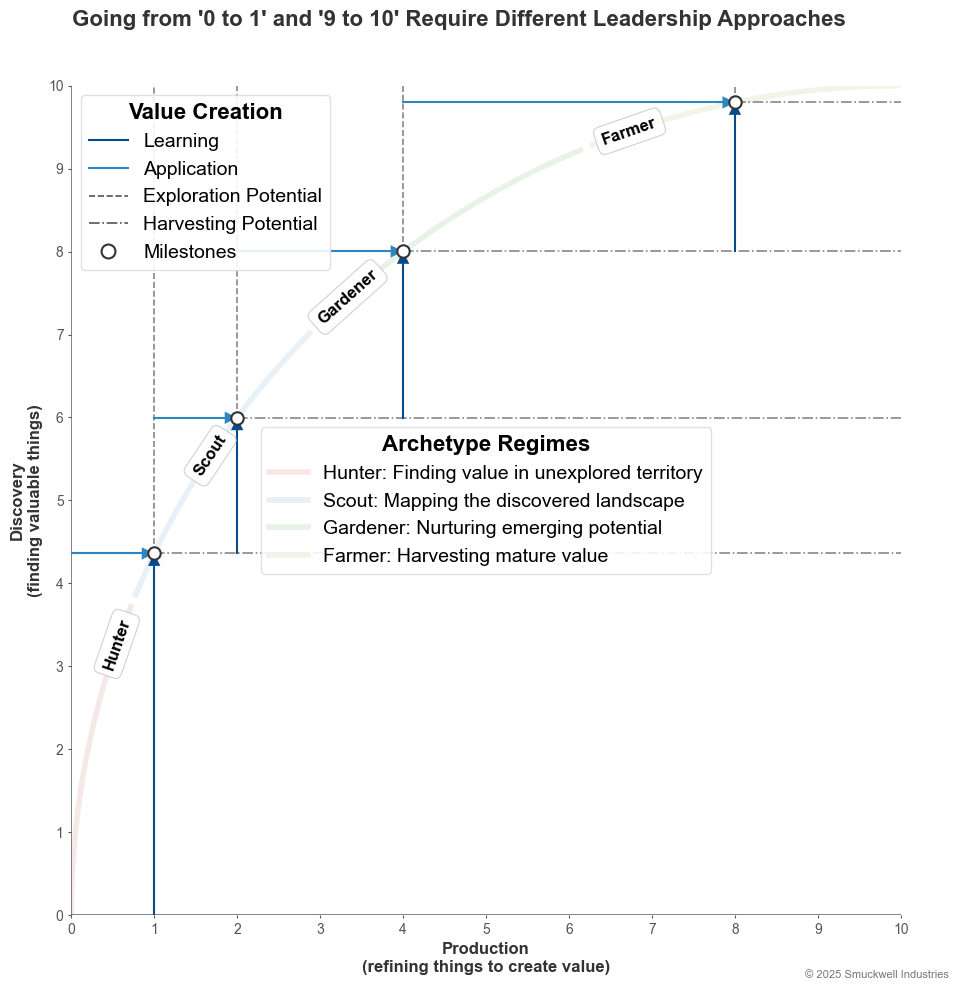

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with square aspect ratio using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Generate data for a quarter circle arc, divided into four equal segments
theta_full = np.linspace(0, np.pi/2, 100)  # 0 to 90 degrees
radius = 10  # Radius to fit in the 10x10 grid

# Define the four regimes with their respective colors from the HBR color palette
regimes = [
    {"name": "Hunter", "color": HBR_COLORS['quadrant4']},    # Light red
    {"name": "Scout", "color": HBR_COLORS['quadrant2']},     # Light blue
    {"name": "Gardener", "color": HBR_COLORS['quadrant1']},  # Light green
    {"name": "Farmer", "color": HBR_COLORS['quadrant3']}     # Light yellow
]

# Split the theta range into four equal parts
theta_segments = np.array_split(theta_full, 4)

# Plot each segment with different colors
for i, (regime, theta) in enumerate(zip(regimes, theta_segments)):
    x = radius * np.cos(theta)  # Values from radius to 0
    y = radius * np.sin(theta)  # Values from 0 to radius
    
    # Flip and adjust to make it go from (0,0) to (10,10)
    x = 10 - x  # Transforms so x goes from 0 to 10
    y = y       # y already goes from 0 to 10
    
    # Plot the segment with thicker line and higher alpha for better visibility
    ax.plot(x, y, color=regime["color"], linewidth=4, alpha=0.9)
    
    # Add regime name at the midpoint of each segment
    if regime["name"] == "Farmer":
        # Shift Farmer label further clockwise (closer to the end of its segment)
        mid_idx = int(len(theta) * 0.15)  # Move from 50% to 75% along the segment
    elif regime["name"] == "Gardener":
        mid_idx = int(len(theta) * 0.15)
    elif regime["name"] == "Hunter":
        mid_idx = int(len(theta) * 0.85)
    else:
        mid_idx = len(theta) // 2
    
    mid_x = x[mid_idx]
    mid_y = y[mid_idx]
    
    # Calculate angle for text alignment
    angle = np.degrees(theta[mid_idx])
    rotation = 90 - angle  # Adjust rotation to be perpendicular to the curve
    
    # Offset the text slightly away from the curve
    offset_dist = 0.0
    dx = offset_dist * np.cos(theta[mid_idx] + np.pi/2)
    dy = offset_dist * np.sin(theta[mid_idx] + np.pi/2)
    
    ax.text(mid_x + dx, mid_y + dy, regime["name"], 
            fontsize=12, ha='center', va='center', 
            rotation=rotation, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9, 
                     edgecolor='#cccccc', linewidth=0.8))

# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Create more professional looking axes with thinner lines
ax.axhline(y=0, color=HBR_COLORS['text'], linewidth=1.2, alpha=0.7)
ax.axvline(x=0, color=HBR_COLORS['text'], linewidth=1.2, alpha=0.7)

# Add intersection lines at x = 1, 2, 4, and 8
x_intersects = [1, 2, 4, 8]
prev_x = 0
prev_y = 0

# Create a consistent color palette for the lines
progress_color = HBR_COLORS['accent_blue']     # Professional blue for progress lines
discovery_color = HBR_COLORS['blue']           # Dark blue for discovery lines
future_exp_color = HBR_COLORS['light_text']    # Light grey for future exploration
future_opt_color = HBR_COLORS['light_text']    # Light grey for future optimization

# Generate complete curve data for finding intersections
complete_theta = np.linspace(0, np.pi/2, 1000)
complete_x = 10 - radius * np.cos(complete_theta)
complete_y = radius * np.sin(complete_theta)

for x_val in x_intersects:
    # Find the closest point on our curve to the x value
    idx = np.abs(complete_x - x_val).argmin()
    y_val = complete_y[idx]
    
    # Draw horizontal line from previous x to current x at current y-level (progress line)
    ax.plot([prev_x, x_val], [y_val, y_val], color=progress_color, linestyle='-', linewidth=1.5)
    
    # Draw a horizontal line from the curve to the right edge (future optimization)
    ax.plot([x_val, 10], [y_val, y_val], color=future_opt_color, linestyle='-.', linewidth=1.2, alpha=0.7)
    
    # Draw vertical line from previous y to current y at current x-level (discovery line)
    ax.plot([x_val, x_val], [prev_y, y_val], color=discovery_color, linestyle='-', linewidth=1.5)
    
    # Draw a vertical line from the curve to the top edge (future exploration)
    ax.plot([x_val, x_val], [y_val, 10], color=future_exp_color, linestyle='--', linewidth=1.2, alpha=0.7)
    
    # Add a milestone marker at the intersection point
    ax.scatter(x_val, y_val, marker='o', s=80, color='white', edgecolor=HBR_COLORS['text'], linewidth=1.5, zorder=5)
    
    # Add small arrow to the progress line
    ax.arrow(x_val-0.3, y_val, 0.15, 0, head_width=0.15, head_length=0.15, 
             fc=progress_color, ec=progress_color, linewidth=0, zorder=4)
    
    # Add small arrow to the discovery line
    ax.arrow(x_val, y_val-0.3, 0, 0.15, head_width=0.15, head_length=0.15, 
             fc=discovery_color, ec=discovery_color, linewidth=0, zorder=4)
    
    # Update previous coordinates for the next iteration
    prev_x = x_val
    prev_y = y_val

# Create legend elements with consistent styling
progress_line = plt.Line2D([], [], color=progress_color, linewidth=1.5, linestyle='-')
discovery_line = plt.Line2D([], [], color=discovery_color, linewidth=1.5, linestyle='-')
future_exp_line = plt.Line2D([], [], color=future_exp_color, linewidth=1.2, linestyle='--')
future_opt_line = plt.Line2D([], [], color=future_opt_color, linewidth=1.2, linestyle='-.')
milestone_point = plt.Line2D([], [], color='white', marker='o', markeredgecolor=HBR_COLORS['text'], 
                           linestyle='None', markersize=10, markeredgewidth=1.5)

# Create legend for regimes
regime_lines = [plt.Line2D([], [], color=regime["color"], linewidth=4) for regime in regimes]

# Add first legend with cleaner styling
first_legend = ax.legend([discovery_line, progress_line, future_exp_line, future_opt_line, milestone_point], 
          ['Learning', 'Application', 'Exploration Potential', 'Harvesting Potential', 'Milestones'], 
          loc='upper left', fontsize=14, title_fontsize=16, title="Value Creation",
          frameon=True, framealpha=0.9, edgecolor='#dddddd')
first_legend.get_title().set_fontweight('bold')

# Add the first legend manually to the plot
ax.add_artist(first_legend)

# Add second legend for regimes with cleaner styling
regime_descriptions = [
    "Hunter: Finding value in unexplored territory",
    "Scout: Mapping the discovered landscape",
    "Gardener: Nurturing emerging potential",
    "Farmer: Harvesting mature value"
]
second_legend = ax.legend(regime_lines, regime_descriptions, 
                         loc='center', fontsize=14, title_fontsize=16, title="Archetype Regimes",
                         frameon=True, framealpha=0.9, edgecolor='#dddddd')
second_legend.get_title().set_fontweight('bold')

# Add axis labels with consistent styling
ax.set_xlabel('Production\n(refining things to create value)', fontsize=12, color=HBR_COLORS['text'], fontweight='bold')
ax.set_ylabel('Discovery\n(finding valuable things)', fontsize=12, color=HBR_COLORS['text'], fontweight='bold')

# Make ticks minimal for cleaner look
ax.set_xticks(range(11))  # Show ticks for all integers from 0 to 10
ax.set_yticks(range(11))  # Show ticks for all integers from 0 to 10
ax.tick_params(axis='both', which='both', length=2, colors=HBR_COLORS['light_text'])  # Short tick marks with light color

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Force aspect ratio to be equal (square)
ax.set_aspect('equal')

# Set figure aesthetics with title
set_figure_aesthetics(fig, ax, 
                     title="Going from '0 to 1' and '9 to 10' Require Different Leadership Approaches")

# Add copyright notice at the bottom of the figure
fig.text(0.99, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure with higher quality
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-going_from_O_to_1.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show plot
plt.show()

# Rumsfeld

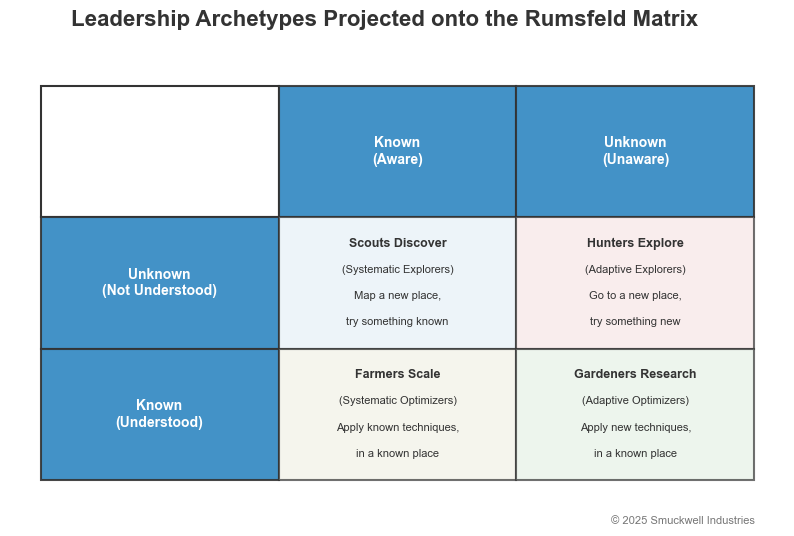

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background - use a more rectangular aspect ratio
fig, ax = plt.subplots(figsize=(10, 6), facecolor=HBR_COLORS['white'])
ax.axis('off')

# Define the table structure
row_headers = ['Unknown\n(Not Understood)', 'Known\n(Understood)']
col_headers = ['Known\n(Aware)', 'Unknown\n(Unaware)']

# Define cell content with better text structure
cell_content = [
    # Row 1: Unknown (Not Understood)
    [
        'Scouts Discover\n(Systematic Explorers)\nMap a new place,\ntry something known', 
        'Hunters Explore\n(Adaptive Explorers)\nGo to a new place,\ntry something new'
    ],
    # Row 2: Known (Understood)  
    [
        'Farmers Scale\n(Systematic Optimizers)\nApply known techniques,\nin a known place', 
        'Gardeners Research\n(Adaptive Optimizers)\nApply new techniques,\nin a known place'
    ]
]

# Define quadrant colors matching your archetype visualizations
quadrant_colors = [
    [HBR_COLORS['quadrant2'], HBR_COLORS['quadrant4']],  # Scout (blue), Hunter (red)
    [HBR_COLORS['quadrant3'], HBR_COLORS['quadrant1']]   # Farmer (yellow), Gardener (green)
]

# Table dimensions - make more compact
table_width = 7
table_height = 3.5
cell_width = table_width / 3  # 3 columns (1 header + 2 data)
cell_height = table_height / 3  # 3 rows (1 header + 2 data)

# Starting position (centered)
start_x = -table_width / 2
start_y = -table_height / 2

# Draw empty top-left corner cell
corner_rect = plt.Rectangle((start_x, start_y + 2*cell_height), cell_width, cell_height, 
                           facecolor=HBR_COLORS['white'], edgecolor=HBR_COLORS['text'], 
                           linewidth=1.5, alpha=1)
ax.add_patch(corner_rect)

# Draw column headers
for j, header in enumerate(col_headers):
    x = start_x + (j + 1) * cell_width
    y = start_y + 2 * cell_height
    
    # Header rectangle
    header_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                               facecolor=HBR_COLORS['accent_blue'], edgecolor=HBR_COLORS['text'], 
                               linewidth=1.5, alpha=0.9)
    ax.add_patch(header_rect)
    
    # Header text
    ax.text(x + cell_width/2, y + cell_height/2, header, 
            ha='center', va='center', fontsize=10, weight='bold', 
            color='white')

# Draw row headers and data cells
for i in range(2):
    # Row header
    x = start_x
    y = start_y + (1 - i) * cell_height
    
    row_header_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                                   facecolor=HBR_COLORS['accent_blue'], edgecolor=HBR_COLORS['text'], 
                                   linewidth=1.5, alpha=0.9)
    ax.add_patch(row_header_rect)
    
    ax.text(x + cell_width/2, y + cell_height/2, row_headers[i], 
            ha='center', va='center', fontsize=10, weight='bold', 
            color='white')
    
    # Data cells
    for j in range(2):
        x = start_x + (j + 1) * cell_width
        y = start_y + (1 - i) * cell_height
        
        # Data cell rectangle with quadrant color
        data_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                                 facecolor=quadrant_colors[i][j], edgecolor=HBR_COLORS['text'], 
                                 linewidth=1.5, alpha=0.7)
        ax.add_patch(data_rect)
        
        # Split content into lines for better display
        content_lines = cell_content[i][j].split('\n')
        
        # Display all lines with appropriate spacing
        line_count = len(content_lines)
        line_spacing = cell_height / (line_count + 1)
        
        for k, line in enumerate(content_lines):
            # Make the first line (archetype name) bold
            weight = 'bold' if k == 0 else 'normal'
            fontsize = 9 if k == 0 else 8
            
            # Position lines evenly within the cell
            text_y = y + cell_height - (k + 1) * line_spacing
            
            ax.text(x + cell_width/2, text_y, line, 
                    ha='center', va='center', fontsize=fontsize, weight=weight,
                    color=HBR_COLORS['text'])

# Set axis limits to show the entire table with minimal padding
ax.set_xlim(start_x - 0.3, start_x + table_width + 0.3)
ax.set_ylim(start_y - 0.3, start_y + table_height + 0.3)

# Add title
fig.suptitle('Leadership Archetypes Projected onto the Rumsfeld Matrix', 
             fontsize=16, fontweight='bold', color=HBR_COLORS['text'], y=0.95)

# Add copyright notice at the bottom of the figure
fig.text(0.87, 0.09, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-rumsfeld_matrix.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show the plot
plt.show()

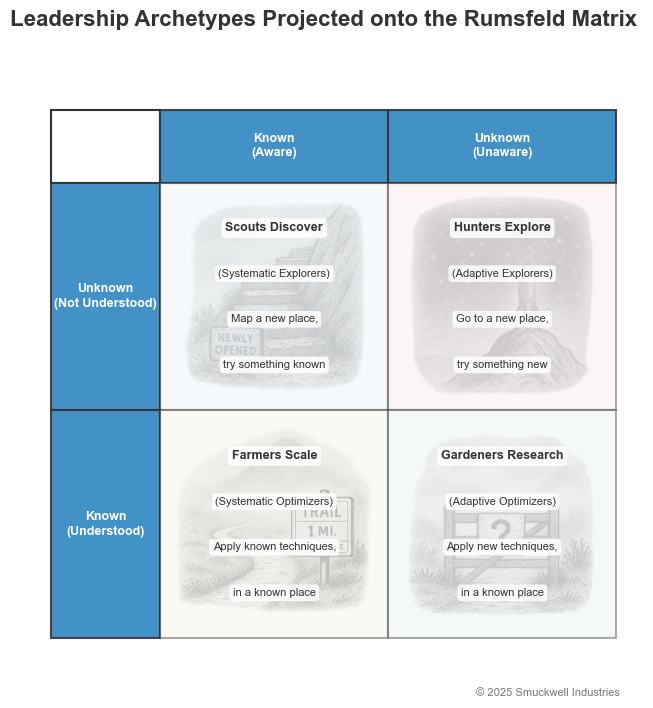

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import image as mpimg
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background - adjusted for square cells
fig, ax = plt.subplots(figsize=(8, 8), facecolor=HBR_COLORS['white'])
ax.axis('off')

# Define the table structure
row_headers = ['Unknown\n(Not Understood)', 'Known\n(Understood)']
col_headers = ['Known\n(Aware)', 'Unknown\n(Unaware)']

# Define cell content with better text structure
cell_content = [
    # Row 1: Unknown (Not Understood)
    [
        'Scouts Discover\n(Systematic Explorers)\nMap a new place,\ntry something known', 
        'Hunters Explore\n(Adaptive Explorers)\nGo to a new place,\ntry something new'
    ],
    # Row 2: Known (Understood)  
    [
        'Farmers Scale\n(Systematic Optimizers)\nApply known techniques,\nin a known place', 
        'Gardeners Research\n(Adaptive Optimizers)\nApply new techniques,\nin a known place'
    ]
]

# Define quadrant colors matching your archetype visualizations
quadrant_colors = [
    [HBR_COLORS['quadrant2'], HBR_COLORS['quadrant4']],  # Scout (blue), Hunter (red)
    [HBR_COLORS['quadrant3'], HBR_COLORS['quadrant1']]   # Farmer (yellow), Gardener (green)
]

# Define the image file names for each quadrant
image_files = [
    # Row 1: Unknown (Not Understood)
    [
        'hunter_scout_gardener_farmer-rumsfeld-unknown_known.png',    # Scout - Unknown/Known
        'hunter_scout_gardener_farmer-rumsfeld-unknown_unknown.png'  # Hunter - Unknown/Unknown
    ],
    # Row 2: Known (Understood)
    [
        'hunter_scout_gardener_farmer-rumsfeld-known_known.png',     # Farmer - Known/Known
        'hunter_scout_gardener_farmer-rumsfeld-known_unknown.png'   # Gardener - Known/Unknown
    ]
]

# Table dimensions - make cells square and headers tighter
data_cell_size = 2.5  # Square cells for data
col_header_height = 0.8  # Much smaller header height - just fit text
row_header_width = 1.2   # Much smaller header width - just fit text

table_width = row_header_width + 2 * data_cell_size
table_height = col_header_height + 2 * data_cell_size

# Starting position (centered)
start_x = -table_width / 2
start_y = -table_height / 2

# Draw empty top-left corner cell
corner_rect = plt.Rectangle((start_x, start_y + 2*data_cell_size), 
                           row_header_width, col_header_height, 
                           facecolor=HBR_COLORS['white'], edgecolor=HBR_COLORS['text'], 
                           linewidth=1.5, alpha=1)
ax.add_patch(corner_rect)

# Draw column headers
for j, header in enumerate(col_headers):
    x = start_x + row_header_width + j * data_cell_size
    y = start_y + 2 * data_cell_size
    
    # Header rectangle
    header_rect = plt.Rectangle((x, y), data_cell_size, col_header_height, 
                               facecolor=HBR_COLORS['accent_blue'], edgecolor=HBR_COLORS['text'], 
                               linewidth=1.5, alpha=0.9)
    ax.add_patch(header_rect)
    
    # Header text
    ax.text(x + data_cell_size/2, y + col_header_height/2, header, 
            ha='center', va='center', fontsize=9, weight='bold', 
            color='white')

# Draw row headers and data cells
for i in range(2):
    # Row header
    x = start_x
    y = start_y + (1 - i) * data_cell_size
    
    row_header_rect = plt.Rectangle((x, y), row_header_width, data_cell_size, 
                                   facecolor=HBR_COLORS['accent_blue'], edgecolor=HBR_COLORS['text'], 
                                   linewidth=1.5, alpha=0.9)
    ax.add_patch(row_header_rect)
    
    ax.text(x + row_header_width/2, y + data_cell_size/2, row_headers[i], 
            ha='center', va='center', fontsize=9, weight='bold', 
            color='white')
    
    # Data cells (now square)
    for j in range(2):
        x = start_x + row_header_width + j * data_cell_size
        y = start_y + (1 - i) * data_cell_size
        
        # Data cell rectangle with quadrant color (reduced alpha for background image visibility)
        data_rect = plt.Rectangle((x, y), data_cell_size, data_cell_size, 
                                 facecolor=quadrant_colors[i][j], edgecolor=HBR_COLORS['text'], 
                                 linewidth=1.5, alpha=0.4)  # Reduced alpha for all cells
        ax.add_patch(data_rect)
        
        # Load and display the background image for each cell
        try:
            image_path = os.path.join('images', image_files[i][j])
            if os.path.exists(image_path):
                img = mpimg.imread(image_path)
                
                # Display image as background, tiled/stretched to fit the cell
                ax.imshow(img, extent=[x, x + data_cell_size, y, y + data_cell_size], 
                         aspect='auto', alpha=0.3, zorder=1)  # Low alpha and zorder for background
        except Exception as e:
            print(f"Could not load image {image_files[i][j]}: {e}")
        
        # Split content into lines for better display
        content_lines = cell_content[i][j].split('\n')
        
        # Display all lines with appropriate spacing
        line_count = len(content_lines)
        line_spacing = data_cell_size / (line_count + 1)
        
        for k, line in enumerate(content_lines):
            # Make the first line (archetype name) bold
            weight = 'bold' if k == 0 else 'normal'
            fontsize = 9 if k == 0 else 8
            
            # Position lines evenly within the cell
            text_y = y + data_cell_size - (k + 1) * line_spacing
            
            # Add text with white background for readability over all background images
            ax.text(x + data_cell_size/2, text_y, line, 
                    ha='center', va='center', fontsize=fontsize, weight=weight,
                    color=HBR_COLORS['text'], zorder=3,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                             alpha=0.85, edgecolor='none'))  # Semi-transparent white background

# Set axis limits to show the entire table with minimal padding
ax.set_xlim(start_x - 0.3, start_x + table_width + 0.3)
ax.set_ylim(start_y - 0.3, start_y + table_height + 0.3)

# Force square aspect ratio
ax.set_aspect('equal')

# Add title
fig.suptitle('Leadership Archetypes Projected onto the Rumsfeld Matrix', 
             fontsize=16, fontweight='bold', color=HBR_COLORS['text'], y=0.95)

# Add copyright notice at the bottom of the figure
fig.text(0.87, 0.09, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-rumsfeld_matrix.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show the plot
plt.show()

# Cynefin

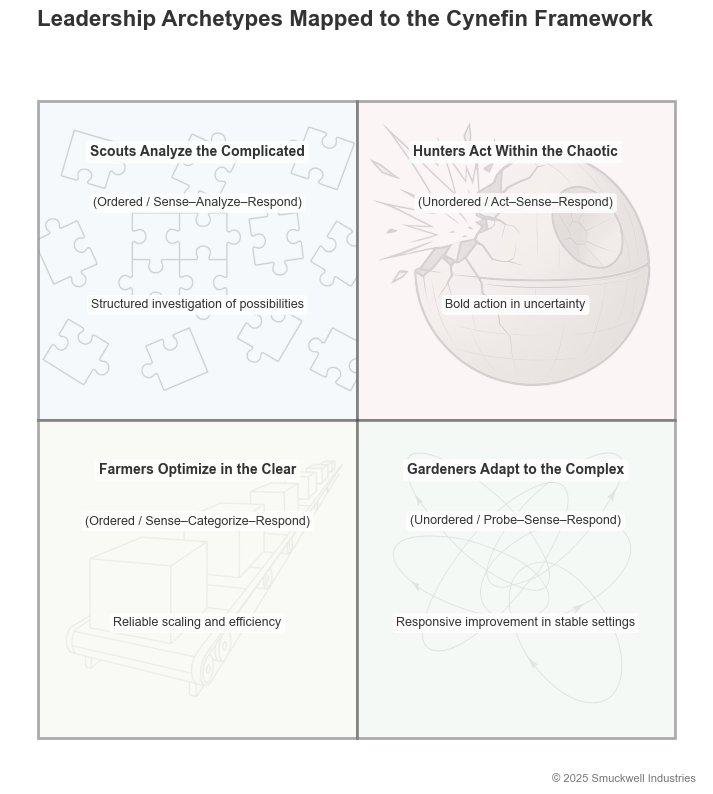

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import image as mpimg
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with appropriate size for the 2x2 table - reduced proportionally
fig, ax = plt.subplots(figsize=(9, 9), facecolor=HBR_COLORS['white'])  # Reduced from (12, 12)
ax.axis('off')

# Define the table content with line breaks for better formatting
cell_content = [
    # Row 1 (top): Scout, Hunter
    [
        "Scouts Analyze the Complicated\n(Ordered / Sense–Analyze–Respond)\n\nStructured investigation of possibilities",
        "Hunters Act Within the Chaotic\n(Unordered / Act–Sense–Respond)\n\nBold action in uncertainty"
    ],
    # Row 2 (bottom): Farmer, Gardener  
    [
        "Farmers Optimize in the Clear\n(Ordered / Sense–Categorize–Respond)\n\nReliable scaling and efficiency",
        "Gardeners Adapt to the Complex\n(Unordered / Probe–Sense–Respond)\n\nResponsive improvement in stable settings"
    ]
]

# Define quadrant colors matching the archetype visualizations
quadrant_colors = [
    [HBR_COLORS['quadrant2'], HBR_COLORS['quadrant4']],  # Scout (blue), Hunter (red)
    [HBR_COLORS['quadrant3'], HBR_COLORS['quadrant1']]   # Farmer (yellow), Gardener (green)
]

# Define the image file names for each quadrant
image_files = [
    # Row 1 (top): Scout, Hunter
    [
        'hunter_scout_gardener_farmer-Cynefin-Complicated.png',  # Scout - Complicated
        'hunter_scout_gardener_farmer-Cynefin-Chaos.png'        # Hunter - Chaotic
    ],
    # Row 2 (bottom): Farmer, Gardener
    [
        'hunter_scout_gardener_farmer-Cynefin-Clear.png',       # Farmer - Clear
        'hunter_scout_gardener_farmer-Cynefin-Complex.png'      # Gardener - Complex
    ]
]

# Table dimensions - make cells 25% smaller
cell_size = 3.375  # Reduced from 4.5 (4.5 * 0.75 = 3.375)
table_size = cell_size * 2  # 2x2 table

# Starting position (centered)
start_x = -table_size / 2
start_y = -table_size / 2

# Draw the 2x2 table
for i in range(2):  # 2 rows
    for j in range(2):  # 2 columns
        x = start_x + j * cell_size
        y = start_y + (1 - i) * cell_size  # Flip y to match standard table layout
        
        # Cell rectangle with quadrant color (reduced alpha for background image visibility)
        cell_rect = plt.Rectangle((x, y), cell_size, cell_size, 
                                 facecolor=quadrant_colors[i][j], edgecolor=HBR_COLORS['text'], 
                                 linewidth=2, alpha=0.4)  # Reduced alpha from 0.7 to 0.4
        ax.add_patch(cell_rect)
        
        # Load and display the background image
        try:
            image_path = os.path.join('images', image_files[i][j])
            if os.path.exists(image_path):
                img = mpimg.imread(image_path)
                
                # Display image as background, tiled/stretched to fit the cell
                ax.imshow(img, extent=[x, x + cell_size, y, y + cell_size], 
                         aspect='auto', alpha=0.3, zorder=1)  # Low alpha and zorder for background
        except Exception as e:
            print(f"Could not load image {image_files[i][j]}: {e}")
        
        # Split content into lines
        content_lines = cell_content[i][j].split('\n')
        
        # Position text with proper spacing
        line_count = len(content_lines)
        line_spacing = cell_size / (line_count + 1)
        
        for k, line in enumerate(content_lines):
            # Make the first line (archetype + domain) bold and larger
            if k == 0:
                weight = 'bold'
                fontsize = 10  # Slightly reduced from 12 for smaller cells
            elif '(' in line and ')' in line:  # Method line
                weight = 'normal'
                fontsize = 9   # Slightly reduced from 10
                line = f"({line.split('(')[1]}"  # Keep the parenthetical part
            elif line.strip() == "":  # Empty line for spacing
                continue
            else:  # Description line
                weight = 'normal'
                fontsize = 9   # Slightly reduced from 11
            
            # Position lines from top to bottom within the cell
            text_y = y + cell_size - (k + 1) * line_spacing * 0.8
            
            # Add text with white background box for better readability over images
            ax.text(x + cell_size/2, text_y, line, 
                    ha='center', va='center', fontsize=fontsize, weight=weight,
                    color=HBR_COLORS['text'], linespacing=1.2, zorder=3,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                             alpha=0.85, edgecolor='none'))  # Semi-transparent white background

# Set axis limits with equal dimensions to maintain square aspect
ax.set_xlim(start_x - 0.3, start_x + table_size + 0.3)
ax.set_ylim(start_y - 0.3, start_y + table_size + 0.3)

# Force square aspect ratio
ax.set_aspect('equal')

# Add title
fig.suptitle('Leadership Archetypes Mapped to the Cynefin Framework', 
             fontsize=16, fontweight='bold', color=HBR_COLORS['text'], y=0.95)

# Add copyright notice at the bottom of the figure
fig.text(0.89, 0.09, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-cynefin_framework.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show the plot
plt.show()

# Popular Culture

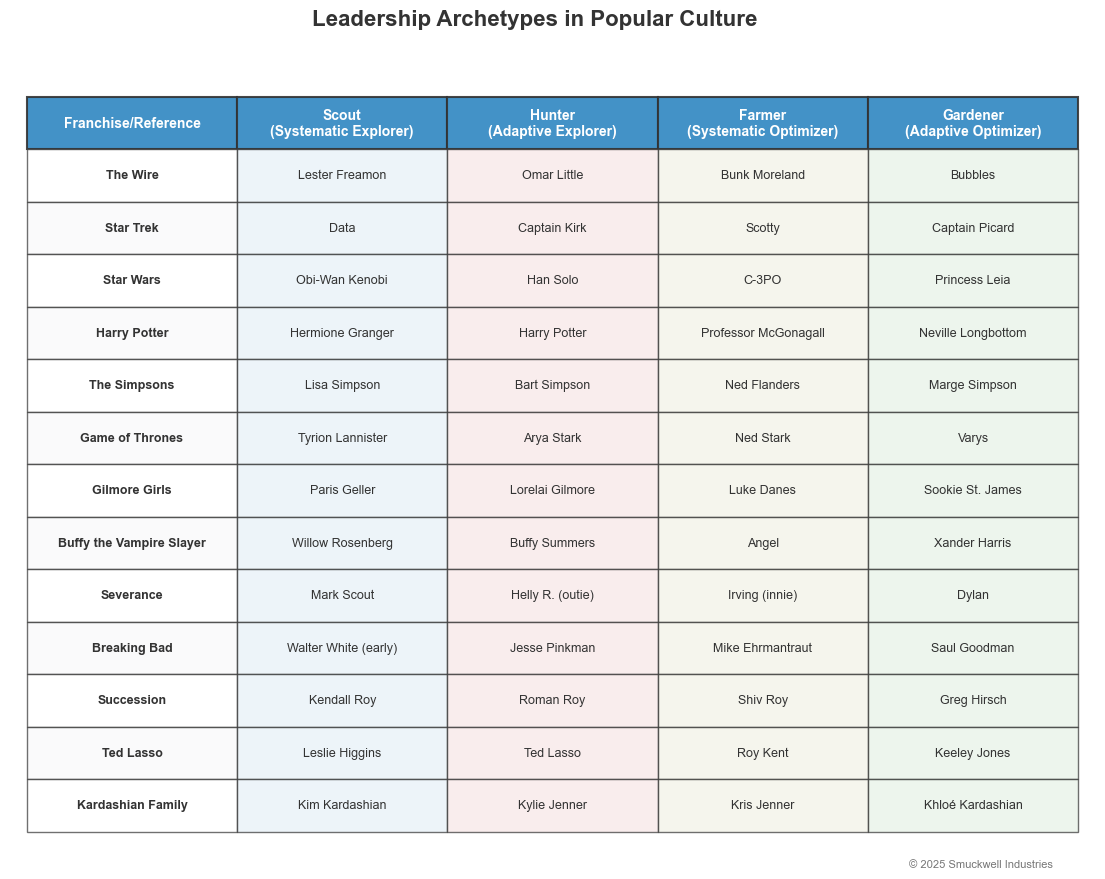

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with appropriate size for the table
fig, ax = plt.subplots(figsize=(14, 10), facecolor=HBR_COLORS['white'])
ax.axis('off')

# Define the table data
franchises = [
    "The Wire", "Star Trek", "Star Wars", "Harry Potter", "The Simpsons",
    "Game of Thrones", "Gilmore Girls", "Buffy the Vampire Slayer", 
    "Severance", "Breaking Bad", "Succession", "Ted Lasso", "Kardashian Family"
]

# Character data organized by archetype
scouts = [
    "Lester Freamon", "Data", "Obi-Wan Kenobi", "Hermione Granger", "Lisa Simpson",
    "Tyrion Lannister", "Paris Geller", "Willow Rosenberg", "Mark Scout", 
    "Walter White (early)", "Kendall Roy", "Leslie Higgins", "Kim Kardashian"
]

hunters = [
    "Omar Little", "Captain Kirk", "Han Solo", "Harry Potter", "Bart Simpson",
    "Arya Stark", "Lorelai Gilmore", "Buffy Summers", "Helly R. (outie)",
    "Jesse Pinkman", "Roman Roy", "Ted Lasso", "Kylie Jenner"
]

farmers = [
    "Bunk Moreland", "Scotty", "C-3PO", "Professor McGonagall", "Ned Flanders",
    "Ned Stark", "Luke Danes", "Angel", "Irving (innie)",
    "Mike Ehrmantraut", "Shiv Roy", "Roy Kent", "Kris Jenner"
]

gardeners = [
    "Bubbles", "Captain Picard", "Princess Leia", "Neville Longbottom", "Marge Simpson",
    "Varys", "Sookie St. James", "Xander Harris", "Dylan",
    "Saul Goodman", "Greg Hirsch", "Keeley Jones", "Khloé Kardashian"
]

# Table dimensions
num_rows = len(franchises)
num_cols = 5  # Franchise + 4 archetypes
cell_height = 0.6
cell_width = 2.5
table_width = cell_width * num_cols
table_height = cell_height * (num_rows + 1)  # +1 for header

# Starting position
start_x = -table_width / 2
start_y = -table_height / 2

# Header data
headers = ["Franchise/Reference", "Scout\n(Systematic Explorer)", "Hunter\n(Adaptive Explorer)", 
          "Farmer\n(Systematic Optimizer)", "Gardener\n(Adaptive Optimizer)"]

# Define colors for each archetype column
archetype_colors = [
    HBR_COLORS['white'],      # Franchise column - white
    HBR_COLORS['quadrant2'],  # Scout - blue
    HBR_COLORS['quadrant4'],  # Hunter - red
    HBR_COLORS['quadrant3'],  # Farmer - yellow  
    HBR_COLORS['quadrant1']   # Gardener - green
]

# Draw header row
for j, (header, color) in enumerate(zip(headers, archetype_colors)):
    x = start_x + j * cell_width
    y = start_y + num_rows * cell_height
    
    # Header background color
    if j == 0:  # Franchise column
        header_color = HBR_COLORS['accent_blue']
        text_color = 'white'
    else:  # Archetype columns
        header_color = HBR_COLORS['accent_blue']
        text_color = 'white'
    
    # Header rectangle
    header_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                               facecolor=header_color, edgecolor=HBR_COLORS['text'], 
                               linewidth=1.5, alpha=0.9)
    ax.add_patch(header_rect)
    
    # Header text
    ax.text(x + cell_width/2, y + cell_height/2, header, 
            ha='center', va='center', fontsize=10, weight='bold', 
            color=text_color)

# Draw data rows
for i in range(num_rows):
    row_data = [franchises[i], scouts[i], hunters[i], farmers[i], gardeners[i]]
    
    for j, (data, color) in enumerate(zip(row_data, archetype_colors)):
        x = start_x + j * cell_width
        y = start_y + (num_rows - 1 - i) * cell_height
        
        # Determine cell background color
        if j == 0:  # Franchise column
            if i % 2 == 0:
                cell_color = HBR_COLORS['white']
            else:
                cell_color = '#f8f9fa'  # Very light gray for alternating rows
        else:  # Archetype columns
            cell_color = color
        
        # Data cell rectangle
        data_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                                 facecolor=cell_color, edgecolor=HBR_COLORS['text'], 
                                 linewidth=1, alpha=0.7)
        ax.add_patch(data_rect)
        
        # Text formatting
        if j == 0:  # Franchise column - bold
            weight = 'bold'
            fontsize = 9
        else:  # Character names - regular
            weight = 'normal'
            fontsize = 9
        
        # Data text
        ax.text(x + cell_width/2, y + cell_height/2, data, 
                ha='center', va='center', fontsize=fontsize, weight=weight,
                color=HBR_COLORS['text'])

# Set axis limits
ax.set_xlim(start_x - 0.2, start_x + table_width + 0.2)
ax.set_ylim(start_y - 0.2, start_y + table_height + 0.2)

# Add title
fig.suptitle('Leadership Archetypes in Popular Culture', 
             fontsize=16, fontweight='bold', color=HBR_COLORS['text'], y=0.95)

# Add subtitle
# fig.text(0.5, 0.91, 'Character examples from film, television, and popular media', 
#          ha='center', fontsize=12, style='italic', color=HBR_COLORS['light_text'])

# Add copyright notice
fig.text(0.87, 0.09, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-popular_culture_examples.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show the plot
plt.show()

# How to Support

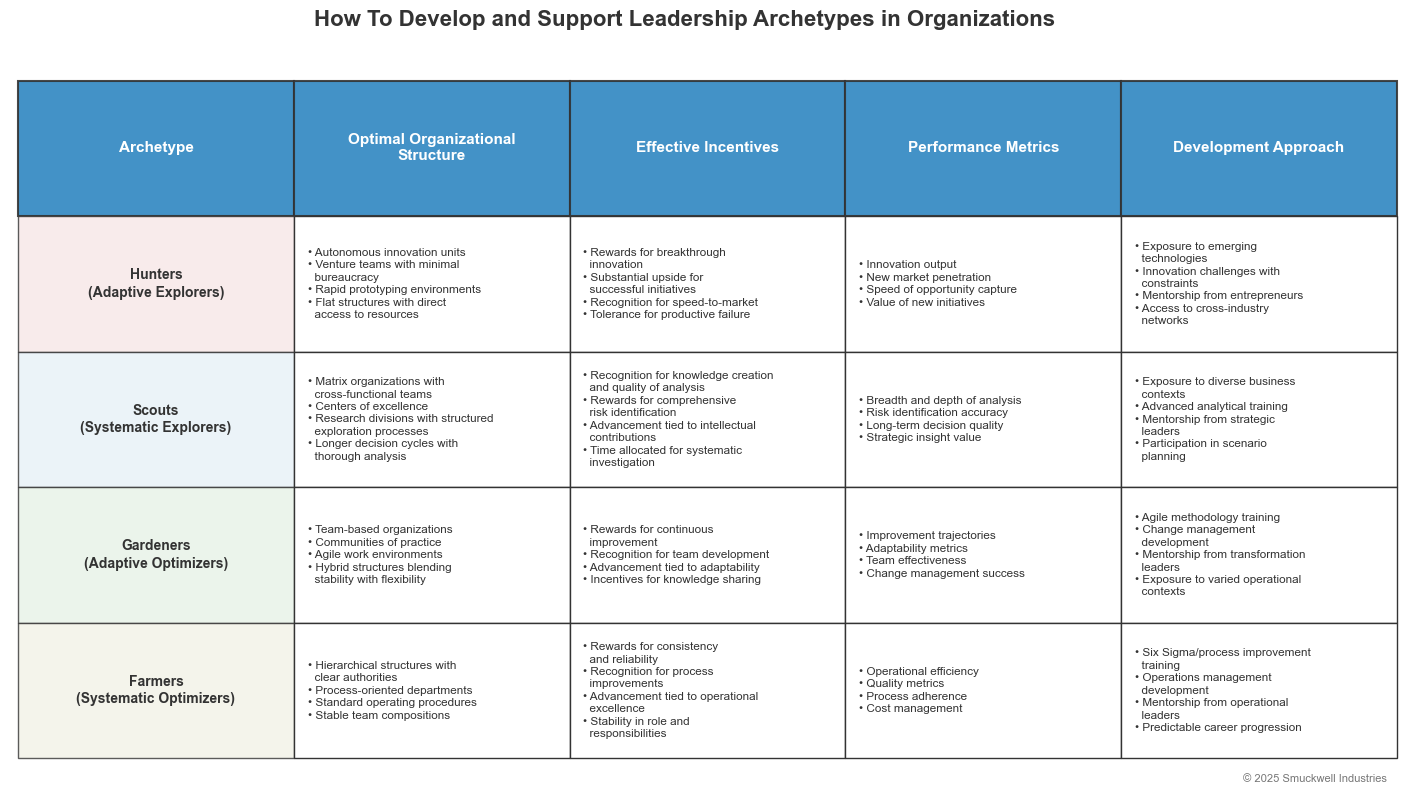

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import textwrap
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with larger size for better readability
fig, ax = plt.subplots(figsize=(18, 9), facecolor=HBR_COLORS['white'])
ax.axis('off')

# Define the table data
archetypes = [
    "Hunters\n(Adaptive Explorers)",
    "Scouts\n(Systematic Explorers)", 
    "Gardeners\n(Adaptive Optimizers)",
    "Farmers\n(Systematic Optimizers)"
]

# Table content organized by column - using line breaks for better formatting
organizational_structures = [
    "• Autonomous innovation units\n• Venture teams with minimal\n  bureaucracy\n• Rapid prototyping environments\n• Flat structures with direct\n  access to resources",
    "• Matrix organizations with\n  cross-functional teams\n• Centers of excellence\n• Research divisions with structured\n  exploration processes\n• Longer decision cycles with\n  thorough analysis",
    "• Team-based organizations\n• Communities of practice\n• Agile work environments\n• Hybrid structures blending\n  stability with flexibility",
    "• Hierarchical structures with\n  clear authorities\n• Process-oriented departments\n• Standard operating procedures\n• Stable team compositions"
]

effective_incentives = [
    "• Rewards for breakthrough\n  innovation\n• Substantial upside for\n  successful initiatives\n• Recognition for speed-to-market\n• Tolerance for productive failure",
    "• Recognition for knowledge creation\n  and quality of analysis\n• Rewards for comprehensive\n  risk identification\n• Advancement tied to intellectual\n  contributions\n• Time allocated for systematic\n  investigation",
    "• Rewards for continuous\n  improvement\n• Recognition for team development\n• Advancement tied to adaptability\n• Incentives for knowledge sharing",
    "• Rewards for consistency\n  and reliability\n• Recognition for process\n  improvements\n• Advancement tied to operational\n  excellence\n• Stability in role and\n  responsibilities"
]

performance_metrics = [
    "• Innovation output\n• New market penetration\n• Speed of opportunity capture\n• Value of new initiatives",
    "• Breadth and depth of analysis\n• Risk identification accuracy\n• Long-term decision quality\n• Strategic insight value",
    "• Improvement trajectories\n• Adaptability metrics\n• Team effectiveness\n• Change management success",
    "• Operational efficiency\n• Quality metrics\n• Process adherence\n• Cost management"
]

development_approaches = [
    "• Exposure to emerging\n  technologies\n• Innovation challenges with\n  constraints\n• Mentorship from entrepreneurs\n• Access to cross-industry\n  networks",
    "• Exposure to diverse business\n  contexts\n• Advanced analytical training\n• Mentorship from strategic\n  leaders\n• Participation in scenario\n  planning",
    "• Agile methodology training\n• Change management\n  development\n• Mentorship from transformation\n  leaders\n• Exposure to varied operational\n  contexts",
    "• Six Sigma/process improvement\n  training\n• Operations management\n  development\n• Mentorship from operational\n  leaders\n• Predictable career progression"
]

# Table dimensions - increased cell width and height for better readability
num_rows = len(archetypes)
num_cols = 5  # Archetype + 4 data columns
cell_height = 1.8  # Increased from 1.5
cell_width = 3.4   # Increased from 3.0
table_width = cell_width * num_cols
table_height = cell_height * (num_rows + 1)  # +1 for header

# Starting position
start_x = -table_width / 2
start_y = -table_height / 2

# Header data
headers = ["Archetype", "Optimal Organizational\nStructure", "Effective Incentives", 
          "Performance Metrics", "Development Approach"]

# Define colors for each archetype row
archetype_colors = [
    HBR_COLORS['quadrant4'],  # Hunter - red
    HBR_COLORS['quadrant2'],  # Scout - blue  
    HBR_COLORS['quadrant1'],  # Gardener - green
    HBR_COLORS['quadrant3']   # Farmer - yellow
]

# Draw header row
for j, header in enumerate(headers):
    x = start_x + j * cell_width
    y = start_y + num_rows * cell_height
    
    # Header rectangle
    header_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                               facecolor=HBR_COLORS['accent_blue'], edgecolor=HBR_COLORS['text'], 
                               linewidth=1.5, alpha=0.9)
    ax.add_patch(header_rect)
    
    # Header text - increased font size
    ax.text(x + cell_width/2, y + cell_height/2, header, 
            ha='center', va='center', fontsize=11, weight='bold', 
            color='white')

# Data for each row
row_data = [
    [archetypes[0], organizational_structures[0], effective_incentives[0], performance_metrics[0], development_approaches[0]],
    [archetypes[1], organizational_structures[1], effective_incentives[1], performance_metrics[1], development_approaches[1]],
    [archetypes[2], organizational_structures[2], effective_incentives[2], performance_metrics[2], development_approaches[2]],
    [archetypes[3], organizational_structures[3], effective_incentives[3], performance_metrics[3], development_approaches[3]]
]

# Draw data rows
for i in range(num_rows):
    for j, data in enumerate(row_data[i]):
        x = start_x + j * cell_width
        y = start_y + (num_rows - 1 - i) * cell_height
        
        # Determine cell background color and text alignment
        if j == 0:  # Archetype column - use archetype color, centered
            cell_color = archetype_colors[i]
            alpha = 0.8
            weight = 'bold'
            fontsize = 10  # Increased from 9
            h_align = 'center'  # Keep archetype column centered
        else:  # Data columns - white background, left-aligned
            cell_color = HBR_COLORS['white']
            alpha = 1.0
            weight = 'normal'
            fontsize = 8.5  # Increased from 7.5
            h_align = 'left'   # Left-align the content
        
        # Data cell rectangle
        data_rect = plt.Rectangle((x, y), cell_width, cell_height, 
                                 facecolor=cell_color, edgecolor=HBR_COLORS['text'], 
                                 linewidth=1, alpha=alpha)
        ax.add_patch(data_rect)
        
        # Data text - handle multi-line content properly
        # For left-aligned text, position it with some padding from the left edge
        if h_align == 'left':
            text_x = x + cell_width * 0.05  # 5% padding from left edge
        else:
            text_x = x + cell_width/2  # Centered
        
        ax.text(text_x, y + cell_height/2, data, 
                ha=h_align, va='center', fontsize=fontsize, weight=weight,
                color=HBR_COLORS['text'], linespacing=1.3)

# Add title
fig.suptitle('How To Develop and Support Leadership Archetypes in Organizations', 
             fontsize=16, fontweight='bold', color=HBR_COLORS['text'], y=0.95)

# Set axis limits with minimal padding
ax.set_xlim(start_x - 0.1, start_x + table_width + 0.1)
ax.set_ylim(start_y - 0.1, start_y + table_height + 0.1)

# Add copyright notice closer to the table
fig.text(0.89, 0.09, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

# Create output directory if it doesn't exist
output_dir = os.path.join('images')
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, 'hunter_scout_gardener_farmer-organizational_structures_incentives.png')
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

# Show the plot
plt.show()

# Archetypal quadrants with a Finders, Minders, and Grinders overlay

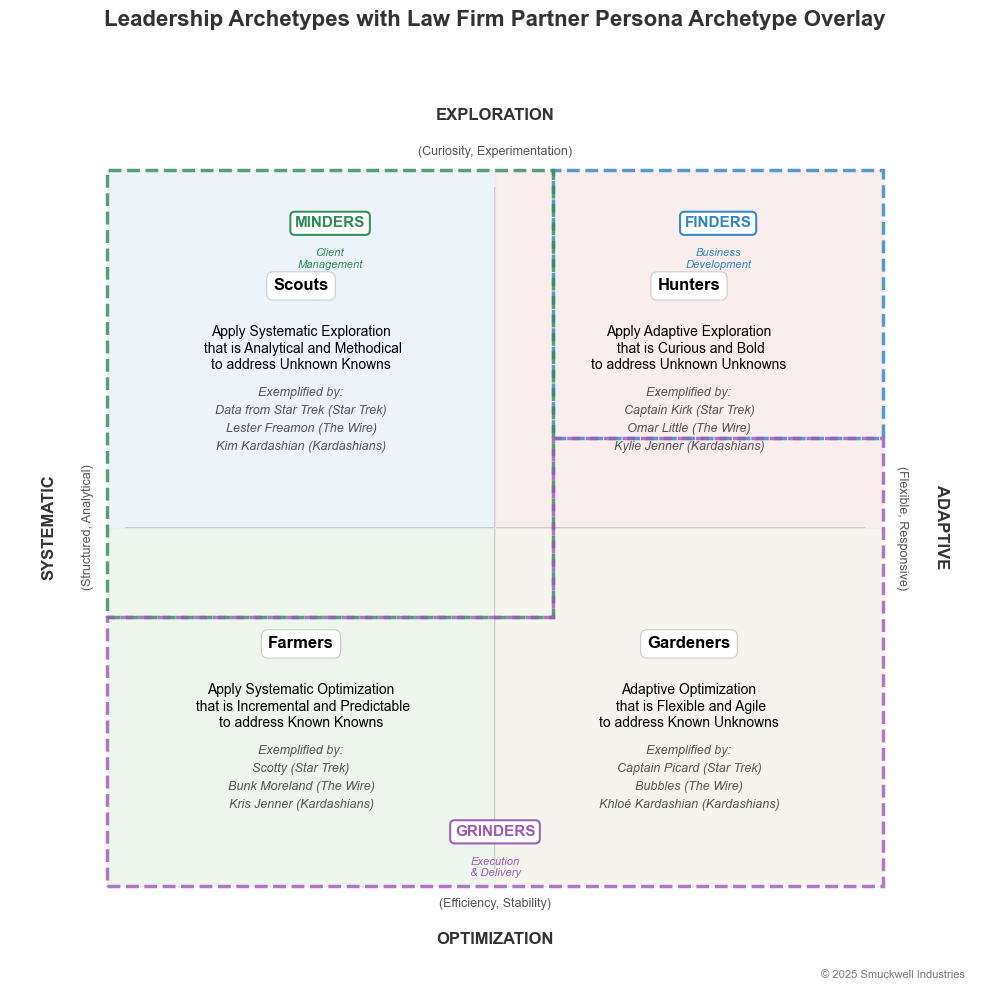

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Add secondary color to HBR_COLORS
HBR_COLORS['secondary'] = '#2E8B57'  # Sea Green color for Minders
HBR_COLORS['primary'] = '#9B59B6'    # Purple color for Grinders (in case it's missing too)

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Add law firm archetype overlay regions with custom boundaries
# These boundaries are based on sociological similarity rather than strict quadrant lines

# Define custom polygons for each law firm archetype
# Finders: High exploration, more adaptive (upper right region)
finders_x = [0.3, 2, 2, 0.3]
finders_y = [0.5, 0.5, 2, 2]
ax.fill(finders_x, finders_y, color='none', edgecolor=HBR_COLORS['accent_blue'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Finders')

# Minders: Balanced, bridging optimization and exploration, more systematic (center-left region)
minders_x = [-2, 0.3, 0.3, -2]
minders_y = [-0.5, -0.5, 2, 2]
ax.fill(minders_x, minders_y, color='none', edgecolor=HBR_COLORS['secondary'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Minders')

# Grinders: Pure optimization, systematic (lower region)
grinders_x = [-2, 2, 2, 0.3, 0.3, -2]
grinders_y = [-2, -2, 0.5, 0.5, -0.5, -0.5]
ax.fill(grinders_x, grinders_y, color='none', edgecolor=HBR_COLORS['primary'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Grinders')

# Add law firm archetype labels
ax.text(1.15, 1.7, 'FINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['accent_blue'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['accent_blue'], linewidth=1.5))
ax.text(1.15, 1.5, 'Business\nDevelopment', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['accent_blue'], style='italic')

ax.text(-0.85, 1.7, 'MINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['secondary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['secondary'], linewidth=1.5))
ax.text(-0.85, 1.5, 'Client\nManagement', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['secondary'], style='italic')

ax.text(0.0, -1.7, 'GRINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['primary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['primary'], linewidth=1.5))
ax.text(0.0, -1.9, 'Execution\n& Delivery', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['primary'], style='italic')

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes with Law Firm Partner Persona Archetype Overlay")

# Add copyright notice at the bottom of the figure
fig.text(0.97, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants_with_law_firm_personas.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()

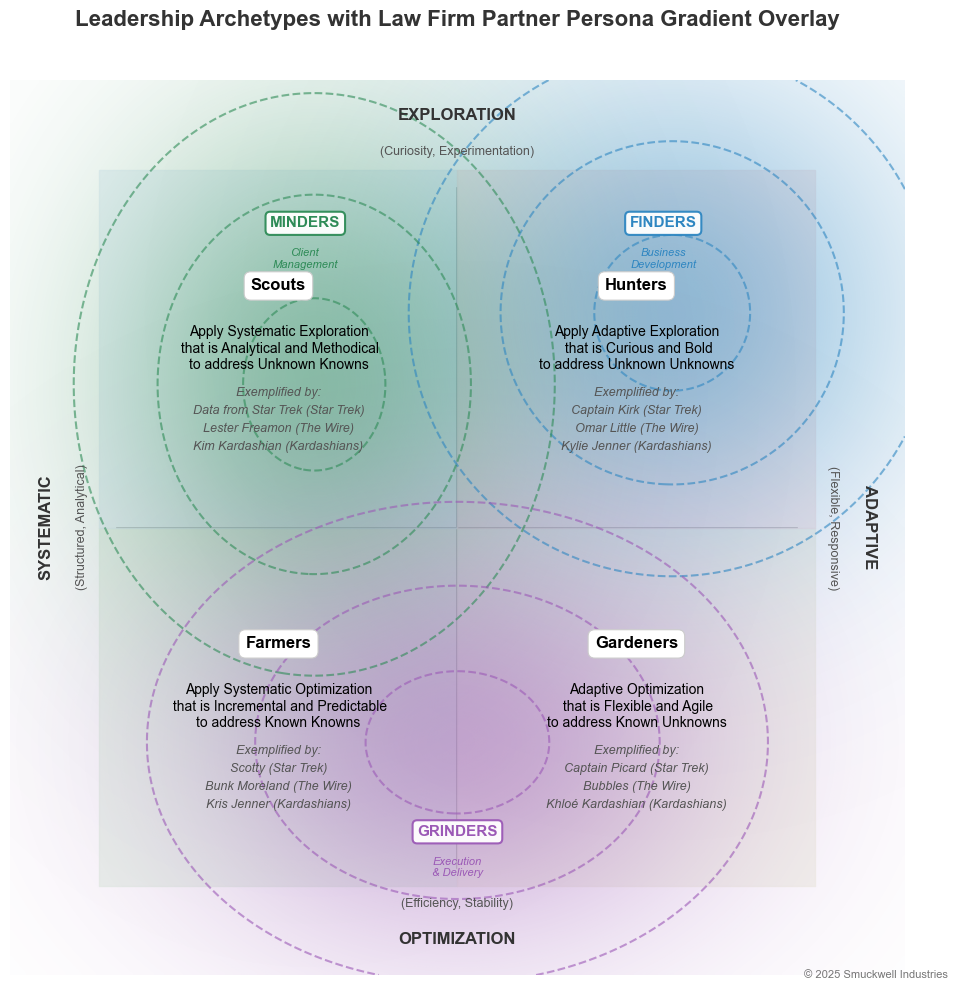

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Add secondary color to HBR_COLORS
HBR_COLORS['secondary'] = '#2E8B57'  # Sea Green color for Minders
HBR_COLORS['primary'] = '#9B59B6'    # Purple color for Grinders (in case it's missing too)

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Create gradient overlays for law firm archetypes
# Create a meshgrid for the entire plot area
x_grid = np.linspace(-2.5, 2.5, 300)
y_grid = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(x_grid, y_grid)

# Define intensity functions for each archetype based on their centers and characteristics
# These use Gaussian-like falloff for smooth gradients

# FINDERS: Peak at upper right (exploration + adaptive)
# Center around (1.2, 1.2) with spread
finders_center_x, finders_center_y = 1.2, 1.2
finders_intensity = np.exp(-((X - finders_center_x)**2 / 1.8 + (Y - finders_center_y)**2 / 1.8))

# MINDERS: Peak at upper left (exploration + systematic, bridging both)
# Center around (-0.8, 0.8) with more spread vertically
minders_center_x, minders_center_y = -0.8, 0.8
minders_intensity = np.exp(-((X - minders_center_x)**2 / 1.5 + (Y - minders_center_y)**2 / 2.2))

# GRINDERS: Peak at lower center (optimization focused, spanning both systematic and adaptive)
# Center around (0, -1.2) with wide horizontal spread
grinders_center_x, grinders_center_y = 0, -1.2
grinders_intensity = np.exp(-((X - grinders_center_x)**2 / 2.5 + (Y - grinders_center_y)**2 / 1.5))

# Convert hex colors to RGB for gradient overlays
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

finders_rgb = hex_to_rgb(HBR_COLORS['accent_blue'])
minders_rgb = hex_to_rgb(HBR_COLORS['secondary'])
grinders_rgb = hex_to_rgb(HBR_COLORS['primary'])

# Create RGBA arrays with intensity-based alpha channel
finders_rgba = np.dstack([np.full_like(finders_intensity, finders_rgb[0]),
                          np.full_like(finders_intensity, finders_rgb[1]),
                          np.full_like(finders_intensity, finders_rgb[2]),
                          finders_intensity * 0.5])  # Max alpha of 0.5

minders_rgba = np.dstack([np.full_like(minders_intensity, minders_rgb[0]),
                          np.full_like(minders_intensity, minders_rgb[1]),
                          np.full_like(minders_intensity, minders_rgb[2]),
                          minders_intensity * 0.5])

grinders_rgba = np.dstack([np.full_like(grinders_intensity, grinders_rgb[0]),
                           np.full_like(grinders_intensity, grinders_rgb[1]),
                           np.full_like(grinders_intensity, grinders_rgb[2]),
                           grinders_intensity * 0.5])

# Plot the gradient overlays
ax.imshow(finders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
ax.imshow(minders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
ax.imshow(grinders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')

# Add contour lines to show intensity levels more clearly
contour_levels = [0.3, 0.6, 0.9]
ax.contour(X, Y, finders_intensity, levels=contour_levels, colors=[HBR_COLORS['accent_blue']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2)
ax.contour(X, Y, minders_intensity, levels=contour_levels, colors=[HBR_COLORS['secondary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2)
ax.contour(X, Y, grinders_intensity, levels=contour_levels, colors=[HBR_COLORS['primary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2)

# Add law firm archetype labels
ax.text(1.15, 1.7, 'FINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['accent_blue'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['accent_blue'], linewidth=1.5), zorder=10)
ax.text(1.15, 1.5, 'Business\nDevelopment', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['accent_blue'], style='italic', zorder=10)

ax.text(-0.85, 1.7, 'MINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['secondary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['secondary'], linewidth=1.5), zorder=10)
ax.text(-0.85, 1.5, 'Client\nManagement', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['secondary'], style='italic', zorder=10)

ax.text(0.0, -1.7, 'GRINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['primary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['primary'], linewidth=1.5), zorder=10)
ax.text(0.0, -1.9, 'Execution\n& Delivery', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['primary'], style='italic', zorder=10)

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes with Law Firm Partner Persona Gradient Overlay")

# Add copyright notice at the bottom of the figure
fig.text(0.99, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants_with_law_firm_persona_gradients.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()

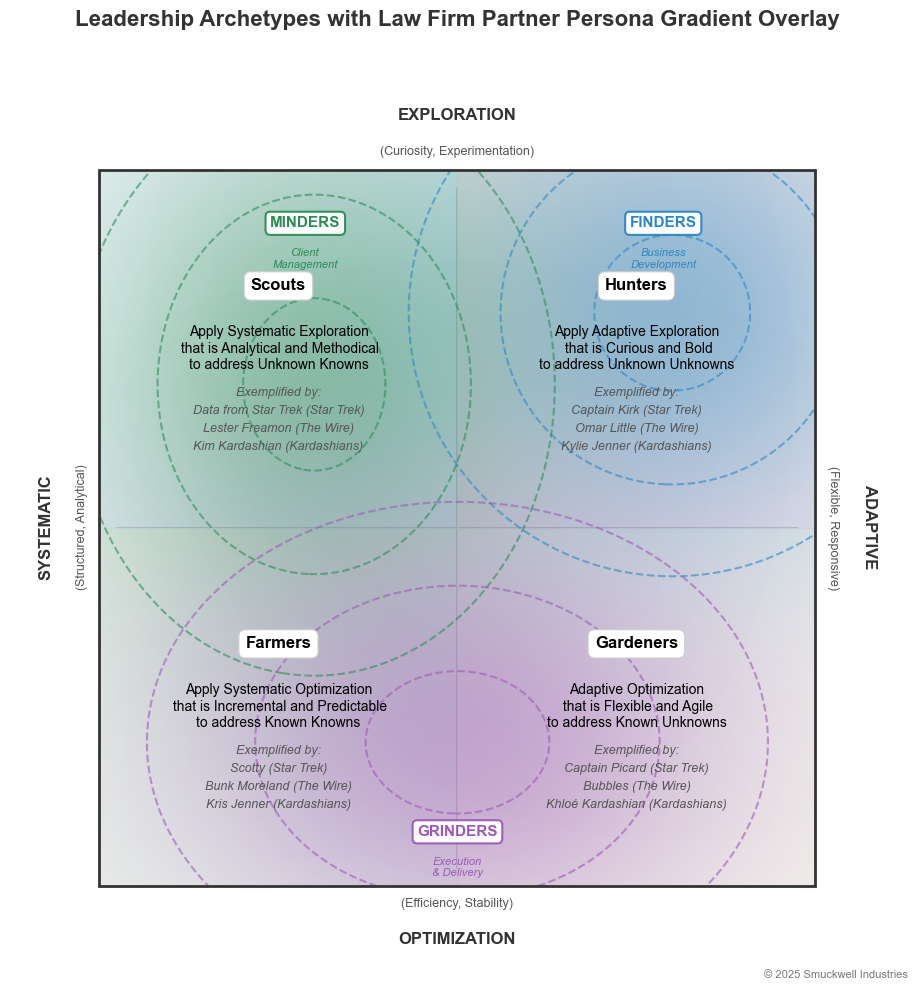

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.path import Path
import matplotlib.patches as mpatches
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Add secondary color to HBR_COLORS
HBR_COLORS['secondary'] = '#2E8B57'  # Sea Green color for Minders
HBR_COLORS['primary'] = '#9B59B6'    # Purple color for Grinders (in case it's missing too)

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Create a clipping path for the quadrant square
quadrant_bound = 2.0
clip_path = Path([(-quadrant_bound, -quadrant_bound), 
                  (quadrant_bound, -quadrant_bound), 
                  (quadrant_bound, quadrant_bound), 
                  (-quadrant_bound, quadrant_bound), 
                  (-quadrant_bound, -quadrant_bound)])
clip_patch = mpatches.PathPatch(clip_path, transform=ax.transData, 
                                facecolor='none', edgecolor='none')

# Create gradient overlays for law firm archetypes
# Create a meshgrid for the entire plot area
x_grid = np.linspace(-2.5, 2.5, 300)
y_grid = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(x_grid, y_grid)

# Define intensity functions for each archetype based on their centers and characteristics
# These use Gaussian-like falloff for smooth gradients

# FINDERS: Peak at upper right (exploration + adaptive)
# Center around (1.2, 1.2) with spread
finders_center_x, finders_center_y = 1.2, 1.2
finders_intensity = np.exp(-((X - finders_center_x)**2 / 1.8 + (Y - finders_center_y)**2 / 1.8))

# MINDERS: Peak at upper left (exploration + systematic, bridging both)
# Center around (-0.8, 0.8) with more spread vertically
minders_center_x, minders_center_y = -0.8, 0.8
minders_intensity = np.exp(-((X - minders_center_x)**2 / 1.5 + (Y - minders_center_y)**2 / 2.2))

# GRINDERS: Peak at lower center (optimization focused, spanning both systematic and adaptive)
# Center around (0, -1.2) with wide horizontal spread
grinders_center_x, grinders_center_y = 0, -1.2
grinders_intensity = np.exp(-((X - grinders_center_x)**2 / 2.5 + (Y - grinders_center_y)**2 / 1.5))

# Convert hex colors to RGB for gradient overlays
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

finders_rgb = hex_to_rgb(HBR_COLORS['accent_blue'])
minders_rgb = hex_to_rgb(HBR_COLORS['secondary'])
grinders_rgb = hex_to_rgb(HBR_COLORS['primary'])

# Create RGBA arrays with intensity-based alpha channel
finders_rgba = np.dstack([np.full_like(finders_intensity, finders_rgb[0]),
                          np.full_like(finders_intensity, finders_rgb[1]),
                          np.full_like(finders_intensity, finders_rgb[2]),
                          finders_intensity * 0.5])  # Max alpha of 0.5

minders_rgba = np.dstack([np.full_like(minders_intensity, minders_rgb[0]),
                          np.full_like(minders_intensity, minders_rgb[1]),
                          np.full_like(minders_intensity, minders_rgb[2]),
                          minders_intensity * 0.5])

grinders_rgba = np.dstack([np.full_like(grinders_intensity, grinders_rgb[0]),
                           np.full_like(grinders_intensity, grinders_rgb[1]),
                           np.full_like(grinders_intensity, grinders_rgb[2]),
                           grinders_intensity * 0.5])

# Plot the gradient overlays with clipping
img1 = ax.imshow(finders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
img2 = ax.imshow(minders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
img3 = ax.imshow(grinders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')

# Apply clipping to each image
img1.set_clip_path(clip_patch)
img2.set_clip_path(clip_patch)
img3.set_clip_path(clip_patch)

# Add contour lines to show intensity levels more clearly with clipping
contour_levels = [0.3, 0.6, 0.9]
cs1 = ax.contour(X, Y, finders_intensity, levels=contour_levels, colors=[HBR_COLORS['accent_blue']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)
cs2 = ax.contour(X, Y, minders_intensity, levels=contour_levels, colors=[HBR_COLORS['secondary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)
cs3 = ax.contour(X, Y, grinders_intensity, levels=contour_levels, colors=[HBR_COLORS['primary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)

# Add a crisp border around the quadrant area to define the clean boundary
border_rect = Rectangle((-quadrant_bound, -quadrant_bound), 2*quadrant_bound, 2*quadrant_bound,
                        fill=False, edgecolor=HBR_COLORS['text'], linewidth=2, zorder=5)
ax.add_patch(border_rect)

# Add law firm archetype labels
ax.text(1.15, 1.7, 'FINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['accent_blue'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['accent_blue'], linewidth=1.5), zorder=10)
ax.text(1.15, 1.5, 'Business\nDevelopment', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['accent_blue'], style='italic', zorder=10)

ax.text(-0.85, 1.7, 'MINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['secondary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['secondary'], linewidth=1.5), zorder=10)
ax.text(-0.85, 1.5, 'Client\nManagement', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['secondary'], style='italic', zorder=10)

ax.text(0.0, -1.7, 'GRINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['primary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['primary'], linewidth=1.5), zorder=10)
ax.text(0.0, -1.9, 'Execution\n& Delivery', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['primary'], style='italic', zorder=10)

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes with Law Firm Partner Persona Gradient Overlay")

# Add copyright notice at the bottom of the figure
fig.text(0.94, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants_with_law_firm_persona_gradients.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()